# Get Galaxies From Halos

info: https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/ClustDataVecY3 <br>
rm  : https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/RedMaPPer_on_Y3A2 <br>
path: /project/projectdirs/des/www/y3_cats/	

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from astropy.table import Table, vstack
from astropy.io.fits import getdata

import pandas as pd

import esutil

## Load

In [2]:
import h5py

#path   = '/data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/'
path   = '/data/des81.b/data/mariaeli/y3_cats/subsampled/'
fname  =     path+'Y3_GOLD_2_2.1_subsampled.h5'
fname_aux  = path+'Y3_GOLD_2_2.1_DNF_subsampled.h5'

master = h5py.File(fname,'r')
aux    = h5py.File(fname_aux,'r')

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
ls /data/des81.b/data/mariaeli/y3_cats/subsampled

Y3_GOLD_2_2.1_BPZ_subsampled.h5
Y3_GOLD_2_2.1_DNF_subsampled.h5
Y3_GOLD_2_2_1_maps.h5
Y3_GOLD_2_2.1_subsampled.h5
y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled.h5
Y3_mastercat_6_15_19_subsampled.h5
y3v02-mcal-003-v1_subsampled.h5


In [4]:
ls /global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/v1.9.8/sampleselection/Y3a/mastercat/

ls: cannot access /global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/v1.9.8/sampleselection/Y3a/mastercat/: No such file or directory


In [5]:
def show_h5_group(name,node):
    ''' show all the h5 groups
    Example:
    fmaster = h5py.File(copa.master_fname,'r')
    fmaster.visititems(show_h5_group)

    ## https://stackoverflow.com/questions/45562169/traverse-hdf5-file-tree-and-continue-after-return
    '''
    if isinstance(node, h5py.Group):
        print(name,node)
    return None

def show_h5_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name,node)
    return None

In [6]:
master.visititems(show_h5_dataset)

(u'catalog/gold/a_sed_sfd98_g', <HDF5 dataset "a_sed_sfd98_g": shape (39926304,), type ">f4">)
(u'catalog/gold/a_sed_sfd98_i', <HDF5 dataset "a_sed_sfd98_i": shape (39926304,), type ">f4">)
(u'catalog/gold/a_sed_sfd98_r', <HDF5 dataset "a_sed_sfd98_r": shape (39926304,), type ">f4">)
(u'catalog/gold/a_sed_sfd98_z', <HDF5 dataset "a_sed_sfd98_z": shape (39926304,), type ">f4">)
(u'catalog/gold/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (39926304,), type ">i8">)
(u'catalog/gold/dec', <HDF5 dataset "dec": shape (39926304,), type ">f8">)
(u'catalog/gold/delta_mag_chrom_g', <HDF5 dataset "delta_mag_chrom_g": shape (39926304,), type ">f4">)
(u'catalog/gold/delta_mag_chrom_i', <HDF5 dataset "delta_mag_chrom_i": shape (39926304,), type ">f4">)
(u'catalog/gold/delta_mag_chrom_r', <HDF5 dataset "delta_mag_chrom_r": shape (39926304,), type ">f4">)
(u'catalog/gold/delta_mag_chrom_z', <HDF5 dataset "delta_mag_chrom_z": shape (39926304,), type ">f4">)
(u'catalog/gold/delta_mag_y4_g', <

In [7]:
aux.visititems(show_h5_dataset)

(u'catalog/sheared_1m/zmc_sof', <HDF5 dataset "zmc_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_1m/zmean_sof', <HDF5 dataset "zmean_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_1p/zmc_sof', <HDF5 dataset "zmc_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_1p/zmean_sof', <HDF5 dataset "zmean_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_2m/zmc_sof', <HDF5 dataset "zmc_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_2m/zmean_sof', <HDF5 dataset "zmean_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_2p/zmc_sof', <HDF5 dataset "zmc_sof": shape (39926304,), type ">f4">)
(u'catalog/sheared_2p/zmean_sof', <HDF5 dataset "zmean_sof": shape (39926304,), type ">f4">)
(u'catalog/unsheared/coadd_object_id', <HDF5 dataset "coadd_object_id": shape (39926304,), type ">i8">)
(u'catalog/unsheared/zmc_sof', <HDF5 dataset "zmc_sof": shape (39926304,), type ">f4">)
(u'catalog/unsheared/zmean_sof', <HDF5 dataset "zmean_sof": shape (39926304,), t

In [8]:
mag_i      = master['catalog/gold/sof_cm_mag_corrected_i'][:][:]
maglim_idx = np.where((mag_i<=23.)&(mag_i>=0.))[0]
hpx16384   = master['catalog/gold/hpix_16384'][:][maglim_idx]#.astype(np.int64)

# cid   = aux['catalog/unsheared/coadd_object_id'][:]
# zmean = aux['catalog/unsheared/zmean_sof'][:]

master.close()
aux.close()

In [9]:
mag_i[maglim_idx]

array([21.61505009, 20.68373325, 22.85796721, ..., 21.75018892,
       19.4035524 , 22.85715772])

In [39]:
columns = ['hpix_16384','coadd_object_id','ra','dec','extended_class_mash_sof','flags_gold']
columns+= ['sof_cm_mag_corrected_%s'%(ix) for ix in ['g','r','i','z']]
columns+= ['sof_cm_mag_err_%s'%(ix) for ix in ['g','r','i','z']]

In [40]:
columns

['hpix_16384',
 'coadd_object_id',
 'ra',
 'dec',
 'extended_class_mash_sof',
 'flags_gold',
 'sof_cm_mag_corrected_g',
 'sof_cm_mag_corrected_r',
 'sof_cm_mag_corrected_i',
 'sof_cm_mag_corrected_z',
 'sof_cm_mag_err_g',
 'sof_cm_mag_err_r',
 'sof_cm_mag_err_i',
 'sof_cm_mag_err_z']

### Loading Data

In [12]:
## Healpix map
Nside    = 8
outdir   = '../data/'
hpx_file = outdir+'/hpxmap_nside%i_subsampled.fits'%Nside

In [13]:
hpx_map = Table(getdata(hpx_file))
tiles = np.array(hpx_map['hpx_pixel'][(hpx_map['hpx_value']>0)])-1

In [14]:
tiles

array([  0,   2, 256, 257, 259, 260, 261, 262, 263, 269, 271, 272, 273,
       274, 275, 276, 277, 278, 279])

In [15]:
len(tiles)

19

In [16]:
hpx_map

hpx_pixel,hpx_value
int64,float64
1,546.0
2,0.0
3,3.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [17]:
## get cluster data

path_out = '/data/des61.a/data/johnny/DESY3/data/cutouts/'
fname_out= path_out+'y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled.fits'

cat  = Table(getdata(fname_out))


In [18]:
ra,dec= cat['RA'], cat['DEC']
zcls  = cat['Z_LAMBDA']

zcut  = (zcls<=0.65)&(zcls>=0.2)

lmask = (cat['LAMBDA_CHISQ']>=5.) & zcut
# lmask = (cat['LAMBDA_CHISQ']>=5.)&(cat['LAMBDA_CHISQ']<=20.)&zcut

#patch = dec<40.#(dec>-0.5)&(dec<0.5)&(ra<30)
#cut = np.where(lmask&patch)

cut = np.where(lmask)


In [19]:
cat = cat[cut]

In [20]:
# ra_min,ra_max   = 26.,30.
# dec_min,dec_max = -44.5,-43.

# mask = (cat['RA']<ra_max)&(cat['RA']>ra_min)
# mask&= (cat['DEC']<dec_max)&(cat['DEC']>dec_min)

In [21]:
print(len(cat))

25585


### Healpix Matching

In [22]:
import sys
sys.path.append('../scripts/')
from helper import AngularDistance,get_healpix_list,radec_pix

In [23]:
rad2deg  = 180/np.pi
rmax     = 8 #Mpc around each cluster

#r200     = cat['R200'][:]*0.7 ## Mpc
DA       = np.ones_like(np.array(cat['Z_LAMBDA']))
# DA[cut]  = AngularDistance(np.array(cat['redshift'][cut]))
DA  = AngularDistance(np.array(cat['Z_LAMBDA']))

## compute the radii max
cat['rmax']  = 60*(float(rmax)/DA)*rad2deg ## arcmin

In [24]:
cat

RA,DEC,Z_LAMBDA,LAMBDA_CHISQ,LAMBDA_CHISQ_E,SCALEVAL,tile,rmax
float64,float64,float32,float32,float32,float32,int64,float64
45.213325784218,0.413609510595717,0.26417944,6.9909916,2.1175554,1.1410239,0,32.64571567128423
44.8811817440392,0.328352252722895,0.37183228,37.272118,2.8691561,1.0149995,0,25.847657585623363
44.9093000971721,0.521576665208534,0.20710598,5.511259,1.2947567,1.0212231,0,39.22020394027673
44.8699544543159,0.663876621631463,0.42131603,6.4570675,1.8470399,1.1422087,0,23.931400938923936
44.5028833930552,0.568088348356786,0.49044833,8.760569,1.4227391,1.0171106,0,21.94144073261573
44.4976936090464,0.72541556122261,0.5852238,5.8011036,1.5600871,0.99900776,0,20.041215860422824
44.5627101437473,0.788889255041787,0.4019028,11.445444,1.6827905,0.9999067,0,24.62349970821246
45.0438445368495,0.737060573237541,0.34828237,21.757807,2.8576376,1.1458498,0,26.962478832112453
44.7942991169065,0.906567007309599,0.49183047,7.860525,1.6795193,1.0284135,0,21.90783408696074


In [25]:
ra,dec= cat['RA'], cat['DEC']
cluster_tile = np.array(cat['tile'])

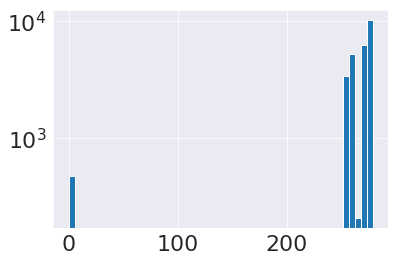

In [26]:
_ = plt.hist(cluster_tile,bins=51)
plt.yscale('log')

In [27]:
#plt.hist(cat['redshift'])

In [28]:
np.unique(cluster_tile)

array([  0,   2, 256, 257, 259, 260, 261, 262, 263, 269, 271, 272, 273,
       274, 275, 276, 277, 278, 279])

In [29]:
tiles

array([  0,   2, 256, 257, 259, 260, 261, 262, 263, 269, 271, 272, 273,
       274, 275, 276, 277, 278, 279])

In [30]:
np.where(cluster_tile==tiles[3])[0].size

2056

### Retrieving Galaxy Catalogs

In [31]:
def save_hdf5_output(gal,cat,outfile):
    df  = gal.to_pandas()
    df.to_hdf(outfile, key='members', mode='w')

    gal = 0

    dfc = cat.to_pandas()
    dfc.to_hdf(outfile, key='cluster', mode='a')

In [32]:
def load_hdf_files(infile,indices,columns,path='catalog/gold/'):
    master = h5py.File(infile,'r')
    gold   = master[path]
    
    mydict = dict().fromkeys(columns)
    
    mydict['id'] = indices
    for col in columns:
        mydict[col] = gold[col][:][indices]
    
    master.close()
    return Table(mydict)

In [33]:
from time import time

In [34]:
# fname  = path+'Buzzard_v1.9.8_Y3a_bpz.h5'
# indexes= h5py.File(fname)
# bpz    = indexes['catalog/bpz']

# #b_cid  = bpz['coadd_object_id'][:][maglim_idx]
# z      = bpz['z'][:][maglim_idx]
# zmean  = bpz['zmean_sof'][:][maglim_idx]

# indexes.close()

In [35]:
indexes= h5py.File(fname_aux,'r')
dnf    = indexes['catalog/unsheared']

d_cid  = dnf['coadd_object_id'][:][maglim_idx]
# d_z    = dnf['z'][:][maglim_idx]
d_zmean= dnf['zmean_sof'][:][maglim_idx]
# d_sigma= dnf['z_sigma'][:][maglim_idx]

d_z = np.zeros_like(d_zmean)
d_sigma = 0.03*(1+d_zmean)

indexes.close()

In [36]:
## BE CAREFULL! The cells below take about an hour to run

In [37]:
outdir = '/data/des61.a/data/johnny/DESY3/data/cutouts/'
outfile_base = outdir+'y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_{}.hdf'

In [41]:
t0 = time()

time_evolution = np.empty((len(tiles)+1,),dtype=np.float64)
time_evolution[0] = t0

for i, tile in enumerate(tiles):
    print('start tile: %i'%(tile))
    outfile = outfile_base.format(tile)
    w       = np.where(cluster_tile==tile)[0]

    if (len(w)>1) & (not os.path.isfile(outfile)):
        circles= get_healpix_list(cat[w],nside=16384)
        match  = esutil.numpy_util.match(circles,hpx16384)
        indices= maglim_idx[match[1]]
        
        print('matching: done')
        data               =  load_hdf_files(fname,indices,columns,path='catalog/gold/')
        #data['z']          = z[match[1]]
        #data['z_mean_bpz'] = zmean[match[1]]
        
        print('loading main data: done')
        data['z']          = d_z[match[1]]
        data['z_mean_dnf'] = d_zmean[match[1]]
        data['z_sigma_dnf']= d_sigma[match[1]]

        data['index']= indices
        data['tile'] = tile

        save_hdf5_output(data,cat[w],outfile)
        data = 0
        print('outfile saved: %s'%(outfile))
    else:
        print('Error: empty tile')
    
    time_evolution[i+1] = time()
    print('partial time: %.2f min'%((time_evolution[i+1]-time_evolution[i])/60.))
    print('run time    : %.2f min'%((time_evolution[i+1]-time_evolution[0])/60.))
    print('\n')

start tile: 0
matching: done
loading main data: done
outfile saved: /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_0.hdf
partial time: 0.65 min
run time    : 0.65 min


start tile: 2
matching: done
loading main data: done
outfile saved: /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_2.hdf
partial time: 0.24 min
run time    : 0.89 min


start tile: 256
matching: done
loading main data: done
outfile saved: /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_256.hdf
partial time: 2.21 min
run time    : 3.10 min


start tile: 257
matching: done
loading main data: done
outfile saved: /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_257.hdf
partial time: 4.88 min
run time    : 7.98 min


start tile: 259
matching: done
loading main 

In [ ]:
maglim_idx

In [ ]:
## In case that the memory crashes, delete the photoz variables (z,zmean,d_zmean,d_sigma) and run the cell below

In [ ]:
# fname     = path+'Buzzard_v1.9.8_Y3a_gold.h5'
# fname_bpz = path+'Buzzard_v1.9.8_Y3a_bpz.h5'
# fname_dnf = fname_aux

# t0 = time()

# time_evolution = np.empty((len(tiles)+1,),dtype=np.float64)
# time_evolution[0] = t0

# for i, tile in enumerate(tiles):
#     print('start tile: %i'%(tile))
    
#     w      = esutil.numpy_util.where1(cluster_tile==tile)
#     circles= get_healpix_list(cat[w],nside=Nside)
    
#     match  = esutil.numpy_util.match(circles,hpx16384)
#     indices= maglim_idx[match[1]]
    
#     data = load_hdf_files(fname,indices,columns,path='catalog/gold/')
#     bpz  = load_hdf_files(fname_bpz,indices,['z','zmean_sof'],path='catalog/bpz/')
#     dnf  = load_hdf_files(fname_aux,indices,['z_mean','z_sigma'],path='catalog/dnf/unsheared')
    
#     data['z']          = bpz['z']
#     data['z_mean_bpz'] = bpz['zmean_sof']

#     data['z_mean_dnf'] = dnf['z_mean']
#     data['z_sigma_dnf']= dnf['z_sigma']
    
#     data['index']= indices
#     data['tile'] = tile
#     time_evolution[i+1] = time()
    
#     outfile = outfile_base.format(tile)
#     save_hdf5_output(data,cat[w],outfile)
#     data = 0
#     print('outfile saved: %s'%(outfile))
    
#     print('partial time: %.2f min'%((time_evolution[i+1]-time_evolution[i])/60.))
#     print('run time    : %.2f min'%((time_evolution[i+1]-time_evolution[0])/60.))
#     print('\n')

In [42]:
import pandas as pd

In [43]:
def upload_dataFrame(infile,keys='members'):
    hdf = pd.HDFStore(infile, mode='r')
    df1 = hdf.get(keys)
    hdf.close()
    data = Table.from_pandas(df1)
    return data

In [47]:
hi = 260
outfile = outfile_base.format(hi)

In [48]:
gi = upload_dataFrame(outfile,keys='members')
ra, dec = gi['ra'], gi['dec']

In [49]:
np.count_nonzero(gi['z_mean_dnf']<0)

3562

In [50]:
1.*np.count_nonzero(gi['z_mean_dnf'])/len(gi)


1.0

In [51]:
w = np.where(cluster_tile==hi)[0]
rac,decc = cat['RA'][w],cat['DEC'][w]

#circles= get_healpix_list(cat[w],nside=16384)
#match  = esutil.numpy_util.match(circles,hpx16384)

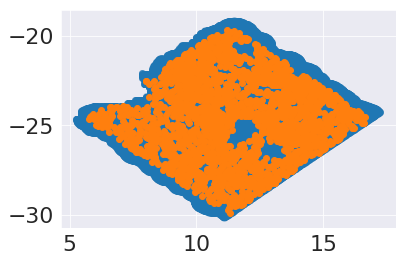

In [52]:
plt.scatter(ra[::10],dec[::10],alpha=0.3)
plt.scatter(rac,decc)

In [53]:
gi

sof_cm_mag_corrected_i,sof_cm_mag_err_i,sof_cm_mag_err_g,sof_cm_mag_corrected_g,hpix_16384,flags_gold,ra,sof_cm_mag_corrected_z,sof_cm_mag_err_r,sof_cm_mag_err_z,coadd_object_id,dec,extended_class_mash_sof,id,sof_cm_mag_corrected_r,z,z_mean_dnf,z_sigma_dnf,index,tile
float64,float64,float64,float64,int64,int32,float64,float64,float64,float64,int64,float64,int16,int64,float64,float32,float32,float32,int64,int64
21.60564193805693,0.055921232332650936,0.1914977837828636,23.987521002163408,1079332929,0,11.1000318992525,21.21601682758829,0.07992986922742125,0.07288781749877886,274171316,-30.1456359199531,3,4489429,22.71707278888059,0.0,0.8024673,0.05407402,4489429,260
22.96126914410424,0.17255014657281287,0.1769462710672868,23.87396956908976,1079332940,0,11.0955181904224,23.013254886931634,0.14470472715328406,0.2415339775648113,274170886,-30.1357654530396,3,4489438,23.13972062656116,0.0,0.44927597,0.043478277,4489438,260
21.837376685401747,0.03840718774464921,0.17238731142914498,24.2957478423318,1079332941,0,11.0995507694232,21.368082854584085,0.04423661123593533,0.03971980847079779,274170925,-30.136713533865,3,4489439,22.664832310440673,0.0,0.6615005,0.049845014,4489439,260
21.930223594696987,0.042899779197968786,0.04163176945824593,22.66987160829307,1079332944,0,11.1084844088518,22.19964716950343,0.036075880507659225,0.09189178004656783,274170954,-30.137495729513,3,4489442,22.283540424734987,0.0,0.62382334,0.0487147,4489442,260
21.780765070992793,0.04247881798582481,0.09365142164386281,23.684824167832343,1079332949,0,11.1144092584639,21.477580032425603,0.03998849357235144,0.0532258716331354,274170557,-30.1295371844793,3,4489446,22.2373961475386,0.0,0.4203061,0.04260918,4489446,260
22.669866849518087,0.07484490708676939,0.06272986563163635,23.216000021894292,1079332954,0,11.0995897507073,22.356613709269574,0.049676865446099956,0.10277266351414041,274170591,-30.129778311718,3,4489448,22.631105077031286,0.0,0.37277186,0.041183155,4489448,260
21.005859214365486,0.02152394024709112,0.02422572381297717,22.063978531995495,1079332959,0,11.1083897325945,20.91365237971402,0.02004748166077011,0.032249625017414435,274170114,-30.1216795412244,3,4489454,21.45673890687678,0.0,0.7134163,0.05140249,4489454,260
22.994012416551275,0.11065202732765601,0.12404747123348658,24.151000669307077,1079332962,0,11.0799708791533,23.30269181377342,0.11831369660580983,0.2052967056439625,274170843,-30.1348487526052,3,4489457,23.874454336493077,0.0,0.9175857,0.05752757,4489457,260
22.79370552129762,0.11193990712921645,0.10588103670131226,23.554647735679076,1079332963,0,11.0852563268874,22.318706268238575,0.10316967763664496,0.12997063953312413,274170766,-30.1333012231468,3,4489458,23.21223184663806,0.0,1.0780423,0.062341265,4489458,260


In [54]:
import healpy as hp
def hpix2ang(pix,nside=1024):
    lon,lat = hp.pix2ang(nside,pix,nest=True)
    dec,ra=(90-(lon)*(180/np.pi)),(lat*(180/np.pi))
    return ra,dec

In [55]:
ra, dec = hpix2ang(circles,nside=16384)
gra,gdec = hpix2ang(myidx,nside=16384)

NameError: name 'myidx' is not defined

In [ ]:
plt.scatter(ra[::10],dec[::10])
plt.scatter(gra[::1000],gdec[::1000])

In [ ]:
data =  load_hdf_files(fname,maglim_idx[match[1]],columns,path='catalog/gold/')

In [ ]:
plt.plot(match[1],data['id'])

In [ ]:
plt.plot(data['hpix_16384'],hpx16384[match[1]])

In [ ]:
maglim_idx[match[1]]

In [ ]:
master  = h5py.File(fname,'r')
indexes= h5py.File(fname_aux,'r')

#select  = indexes['index/gold/select'][:]
# myidx   = master['catalog/gold/hpix_16384'][:][maglim_idx[match[1]]]
# mag_i   = master['catalog/gold/mag_i'][:][maglim_idx[match[1]]]

master.close()
indexes.close()

In [ ]:
maglim_idx[match[1]]

In [ ]:
data=0

In [ ]:
hpx16384[data['id']]

In [ ]:
myidx

In [ ]:
match[1]

In [ ]:
rag,decg = data['ra'], data['dec']

In [ ]:
plt.scatter(ra[::10],dec[::10])
plt.scatter(rag[::100],decg[::100],alpha=0.1)

In [ ]:
plt.scatter(data['hpix_16384'][::100],myidx[::100])



In [ ]:
gi=0